In [1]:
import pandas as pd 

data_cards = pd.read_csv('cardlist.csv', index_col=0)
data_cards

,id,card,cost,rarity,type,isFlying,target,troop_spawned
0,0,Knight,3.0,common,unit,False,ground,NaN
1,1,Archers,3.0,common,unit,False,all,NaN
2,2,Goblins,2.0,common,unit,False,ground,NaN
3,3,Giant,5.0,rare,unit,False,towers,NaN
4,4,P.E.K.K.A,7.0,epic,unit,False,ground,NaN
...,...,...,...,...,...,...,...,...
107,107,Golemites,NaN,epic,unit,False,towers,NaN
108,108,Elixer Golemites,NaN,rare,unit,False,towers,Elixer Blobs
109,109,Elixer Blobs,NaN,rare,unit,False,towers,NaN
110,110,Pigs,NaN,legendary,unit,False,towers,NaN


In [2]:
data_games = pd.read_csv('data_ord.csv',index_col=0)
data_games

,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,p2card2,p2card3,p2card4,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome
0,8,34,37,52,69,88,92,97,11,12,13,58,77,86,87,98,7578,7597,1
1,8,34,37,52,69,88,92,97,11,37,53,83,88,92,97,102,7548,7551,1
2,8,34,37,52,69,88,92,97,19,22,25,32,54,76,87,98,7518,7523,1
3,8,34,37,52,69,88,92,97,28,38,43,46,50,81,102,103,7485,7523,1
4,25,31,59,68,77,98,101,105,23,34,39,73,85,94,98,99,7126,7114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718881,21,37,41,42,49,55,87,95,1,6,17,18,20,41,92,93,5817,5458,1
718882,21,37,41,42,49,55,87,95,7,15,17,21,43,81,87,89,5817,5577,2
718883,21,37,41,42,49,55,87,95,13,35,39,43,48,73,95,99,5817,6087,2
718884,21,37,41,42,49,55,87,95,11,17,18,24,51,77,95,102,5844,5838,2


In [3]:
from collections import defaultdict

cards_winning = {}
cards_winning = defaultdict(lambda:0, cards_winning)
cards_general = {}
cards_general = defaultdict(lambda: 0, cards_general)
most_common = 0 
maximum = 0 

def get_card_occurence(cards_used, outcome): 
    global card_general
    global cards_winning
    i = 0 
    for card in cards_used:
        cards_general[card] = cards_general[card] + 1
        if outcome == 1 and i < 8:
            cards_winning[card] = cards_winning[card] + 1
        elif outcome == 2 and i >= 8: 
            cards_winning[card] = cards_winning[card] + 1
    
lst = []
data_games.apply(lambda x: get_card_occurence([x["p1card1"],x["p1card2"],x["p1card3"],x["p1card4"],x["p1card5"],x["p1card6"],x["p1card7"],x["p1card8"],x["p2card1"],x["p2card2"],x["p2card3"],x["p2card4"],x["p2card5"],x["p2card6"],x["p2card7"],x["p2card8"]],x["outcome"]), axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
718881    None
718882    None
718883    None
718884    None
718885    None
Length: 718886, dtype: object

In [177]:
win_set = []
losses = [] 
loss_rates = []
win_rates = [] 
rarity = []
cards = []
elixr = []
occurrences =[]
for card, wins in cards_winning.items(): 
    cards.append(card)
    win_set.append(wins)
    win_rates.append(wins/cards_general[card])
    losses.append(cards_general[card]-wins)
    occurrences.append(cards_general[card])
    loss_rates.append(1-wins/cards_general[card])
    rarity.append(data_cards.loc[data_cards['id'] == card]['rarity'].values[0])
    elixr.append(data_cards.loc[data_cards['id'] == card]['cost'].values[0])
card_df = pd.DataFrame({'card':cards, 'rarity': rarity, 'cost': elixr, 'wins': win_set, 'losses':losses, 'win_rate': win_rates, 'loss_rate': loss_rates, 'occurrences':occurrences})
card_df

,card,rarity,cost,wins,losses,win_rate,loss_rate,ocurrences
0,8,common,5.0,25130,20665,0.548750,0.451250,45795
1,34,epic,5.0,37106,29545,0.556721,0.443279,66651
2,37,legendary,4.0,119248,96571,0.552537,0.447463,215819
3,52,rare,4.0,24800,20247,0.550536,0.449464,45047
4,69,champion,4.0,34967,27933,0.555914,0.444086,62900
...,...,...,...,...,...,...,...,...
101,61,legendary,3.0,20612,16814,0.550740,0.449260,37426
102,100,epic,3.0,13478,10333,0.566041,0.433959,23811
103,67,champion,4.0,7273,5798,0.556423,0.443577,13071
104,65,rare,3.0,17564,14590,0.546246,0.453754,32154


In [207]:
import statistics
rarities = []
occurrences = []
win_rates = []
for rarity in card_df['rarity'].unique(): 
    rarities.append(rarity)
    win_rates.append(card_df[card_df['rarity']==rarity]['win_rate'].values.mean())
    occurrences.append(card_df[card_df['rarity']==rarity]['ocurrences'].values.sum())
rate_by_rarity = pd.DataFrame({'rarity': rarities, 'win_rates': win_rates, 'occurrences': occurrences}) 
rate_by_rarity 

,rarity,win_rates,occurrences
0,common,0.556347,2930911
1,epic,0.557133,3098137
2,legendary,0.553710,2522337
3,rare,0.555578,2770753
4,champion,0.552021,180038


In [209]:
occurrences = []
costs = []
win_rates = []
for cost in card_df['cost'].unique(): 
    costs.append(cost)
    win_rates.append(card_df[card_df['cost']==cost]['win_rate'].values.mean())
    occurrences.append(card_df[card_df['cost']==cost]['ocurrences'].values.sum())
rate_by_rarity = pd.DataFrame({'cost': costs, 'win_rates': win_rates, 'occurrences': occurrences}) 
rate_by_rarity 

,cost,win_rates,occurrences
0,5.0,0.558443,1301607
1,4.0,0.555018,3732891
2,3.0,0.556857,2929665
3,2.0,0.555377,1676779
4,9.0,0.537071,12503
5,6.0,0.552954,637881
6,1.0,0.552221,519791
7,7.0,0.554579,576310
8,8.0,0.549404,81714
9,0.0,0.593159,33035


In [181]:
from collections import Counter

most_common_cards = Counter(cards_general).most_common()
print(str(len(most_common_cards)) + " cards available to use\n")
print("These are the 5 most popular cards")
print(f'{most_common_cards[1:5]}\n')
cards_used_once = Counter(cards_general.values()).most_common(1)
print("There was " + str(cards_used_once[0][1]) + " card used only once\n")
most_common_winning_cards = Counter(cards_winning).most_common()
print("There are "+str(len(most_common_winning_cards)) + " cards that earned a win\n")
print("These are the 5 cards with the most wins\n")
print(most_common_winning_cards[1:5])
card_df.sort_values(by=['win_rate'], ascending=False)

106 cards available to use

These are the 5 most popular cards
[(98, 441936), (95, 389347), (11, 314353), (42, 299980)]

There was 1 card used only once

There are 106 cards that earned a win

These are the 5 cards with the most wins

[(98, 246900), (95, 216646), (11, 178754), (42, 167415)]


,card,rarity,cost,wins,losses,win_rate,loss_rate,ocurrences
93,17,rare,5.0,62258,42448,0.594598,0.405402,104706
76,93,epic,0.0,19595,13440,0.593159,0.406841,33035
99,7,epic,5.0,50096,36724,0.577010,0.422990,86820
86,64,common,3.0,67637,50287,0.573564,0.426436,117924
49,18,rare,4.0,80077,60035,0.571521,0.428479,140112
...,...,...,...,...,...,...,...,...
98,79,rare,6.0,3000,2542,0.541321,0.458679,5542
48,29,legendary,7.0,40714,34672,0.540074,0.459926,75386
53,60,epic,6.0,17358,14827,0.539320,0.460680,32185
105,66,rare,4.0,14993,12870,0.538097,0.461903,27863


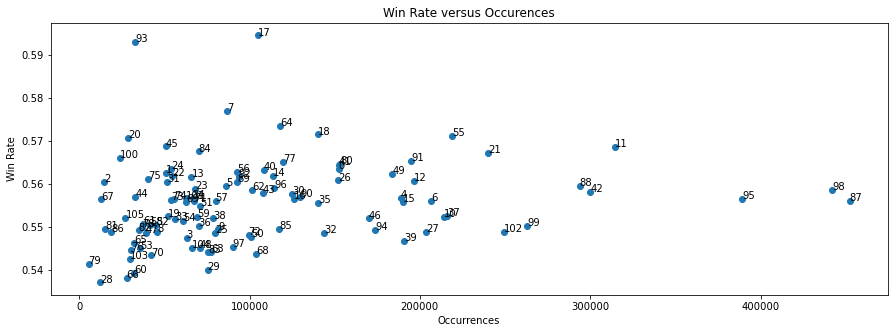

In [211]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
# Setting labels
ax.set_ylabel("Win Rate")
ax.set_xlabel("Occurrences")
ax.set_title("Win Rate versus Occurences")
# Plotting occurences by winrate
ax.scatter(card_df["ocurrences"], card_df["win_rate"])

# label points to visualise outliers
for i, txt in enumerate(card_df["card"]):
    ax.annotate(txt, (card_df["ocurrences"][i], card_df["win_rate"][i]))
fig.show()